Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Carregando o dataset

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Exploração dos dados

In [4]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

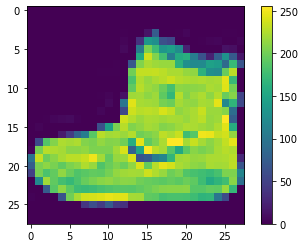

In [5]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [6]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [56]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss'),
    keras.callbacks.ModelCheckpoint(filepath='../models/best_model.hdf5', monitor='val_loss',save_best_only=True)
    ]

modelo.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=480,
                       epochs=5, validation_split=0.2,callbacks=callbacks)


Epoch 1/5
100/100 [==============================] - 1s 5ms/step - loss: 0.6435 - accuracy: 0.7767 - val_loss: 0.4517 - val_accuracy: 0.8432
Epoch 2/5
100/100 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8482 - val_loss: 0.3907 - val_accuracy: 0.8627


Sumário do modelo

In [17]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Estudando zeragem dos pesos

Pesos da primeira camada Dense

In [19]:
pesos_da_camada_dense = modelo.layers[1].get_weights()[0]
vieses_da_camada_dense = modelo.layers[1].get_weights()[1]

In [31]:
pesos_da_camada_dense.shape


# modelo.layers[1].set_weights(
#     [pesos_da_camada_dense_zerados:=np.zeros((784, 256)), vieses_da_camada_dense])

modelo.layers[1].set_weights(
    [pesos_da_camada_dense_aleatorios:=np.random.rand(784, 256), vieses_da_camada_dense])

modelo.layers[1].get_weights()


[array([[0.6753537 , 0.11382582, 0.43431532, ..., 0.99749213, 0.27621827,
         0.20520498],
        [0.88549477, 0.00622827, 0.7628985 , ..., 0.09791698, 0.4975873 ,
         0.44621748],
        [0.44059715, 0.5664013 , 0.316932  , ..., 0.49940503, 0.3146455 ,
         0.4082218 ],
        ...,
        [0.00768024, 0.97981906, 0.88853794, ..., 0.5937559 , 0.50157875,
         0.20711188],
        [0.14785773, 0.8977284 , 0.7589078 , ..., 0.0902441 , 0.04070599,
         0.16321132],
        [0.7309471 , 0.9232853 , 0.32521993, ..., 0.20166308, 0.2095682 ,
         0.26620856]], dtype=float32),
 array([-0.15336609, -0.21727692, -0.0091905 ,  0.06269353,  0.15935427,
         0.02188217,  0.03794732,  0.21225916,  0.0657865 ,  0.07583074,
        -0.32283115,  0.18799081,  0.3012288 ,  0.00756138, -0.08062172,
        -0.05820587, -0.1659024 ,  0.03964073,  0.2627789 ,  0.2732208 ,
         0.12662521, -0.02083159, -0.01474713,  0.03253857,  0.06431963,
         0.21598414,  0.26812

In [32]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 36.1784 - accuracy: 0.4112 - val_loss: 10.2279 - val_accuracy: 0.5342
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 10.5782 - accuracy: 0.5874 - val_loss: 4.4144 - val_accuracy: 0.7105
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 5.8413 - accuracy: 0.6465 - val_loss: 3.0583 - val_accuracy: 0.7181
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 3.6650 - accuracy: 0.6879 - val_loss: 2.6157 - val_accuracy: 0.6939
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3444 - accuracy: 0.7231 - val_loss: 1.5159 - val_accuracy: 0.7767


In [34]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

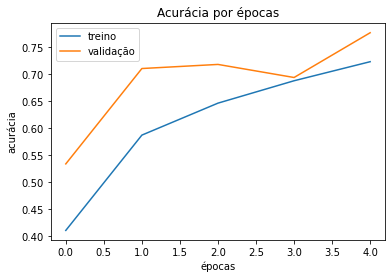

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


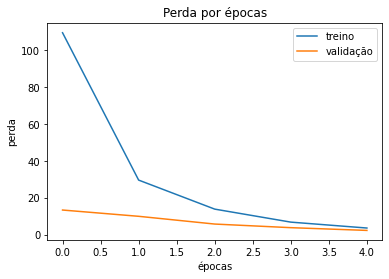

In [30]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])


# Salvando o modelo e plotando os gráficos

Salvando e carregando o modelo treinado

In [48]:
modelo.save('../models/modelo.h5')
modelo_salvo = load_model('../models/modelo.h5')


Visualizando as acurácias de treino e validação por época

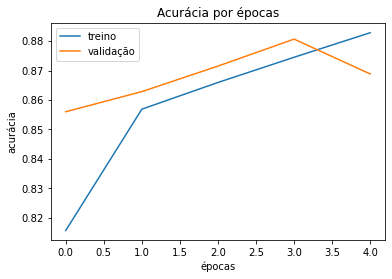

In [10]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

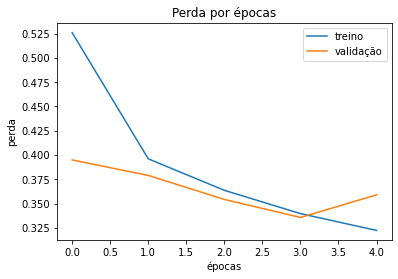

In [11]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [12]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 0s 1ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 0s 1ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [13]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 57.6524 - accuracy: 0.8598
Perda do teste: 57.65242385864258
Acurácia do teste: 0.8597999811172485
